In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# 1. Load the cleaned dataset
file_path = r'D:\RoadSafe_Analytics\data\US_Accidents_Cleaned_Final.csv'
df = pd.read_csv(file_path)

# 2. Convert Start_Time to datetime and extract Hour
df['Start_Time'] = pd.to_datetime(df['Start_Time'], errors='coerce')
df['Hour'] = df['Start_Time'].dt.hour

sns.set_theme(style="whitegrid")
print("✔ Week 6 Setup Complete: Data loaded and ready!")

✔ Week 6 Setup Complete: Data loaded and ready!


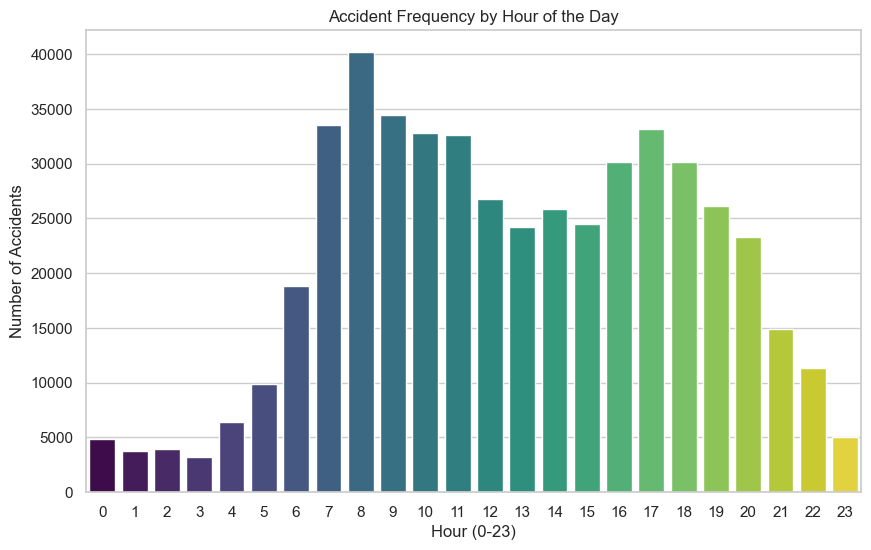

Insight: The peak hour for accidents is 8:00.


In [4]:
plt.figure(figsize=(10, 6))
# Using hue='Hour' to avoid the FutureWarning
sns.countplot(x='Hour', data=df, hue='Hour', palette='viridis', legend=False)

plt.title('Accident Frequency by Hour of the Day')
plt.xlabel('Hour (0-23)')
plt.ylabel('Number of Accidents')
plt.show()

peak_hour = df['Hour'].value_counts().idxmax()
print(f"Insight: The peak hour for accidents is {peak_hour}:00.")

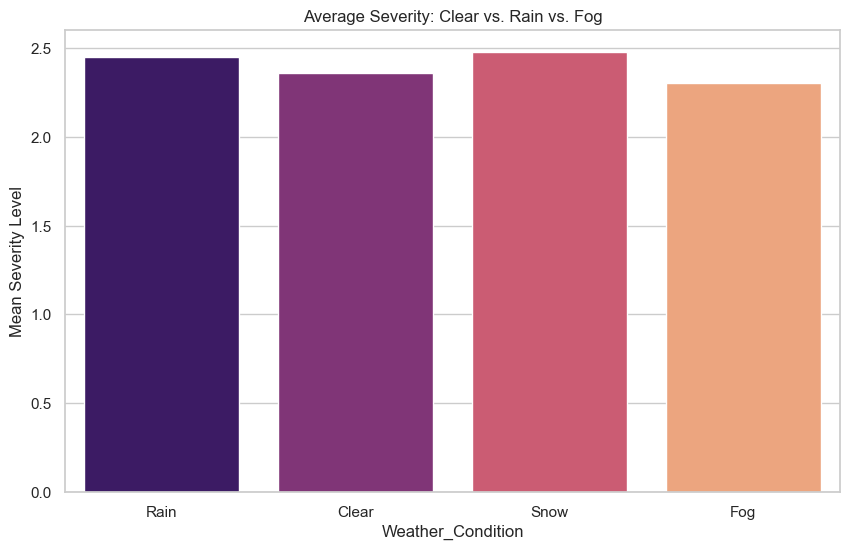

Mean Severity by Weather:
Weather_Condition
Clear    2.358574
Fog      2.302747
Rain     2.451036
Snow     2.477723
Name: Severity, dtype: float64


In [5]:
# Filtering specific weather conditions
weather_list = ['Clear', 'Rain', 'Fog', 'Snow']
weather_df = df[df['Weather_Condition'].isin(weather_list)]

plt.figure(figsize=(10, 6))
# Using hue='Weather_Condition' to avoid the FutureWarning
sns.barplot(x='Weather_Condition', y='Severity', data=weather_df, 
            hue='Weather_Condition', palette='magma', errorbar=None, legend=False)

plt.title('Average Severity: Clear vs. Rain vs. Fog')
plt.ylabel('Mean Severity Level')
plt.show()

# Precise means for report
print("Mean Severity by Weather:")
print(weather_df.groupby('Weather_Condition')['Severity'].mean())

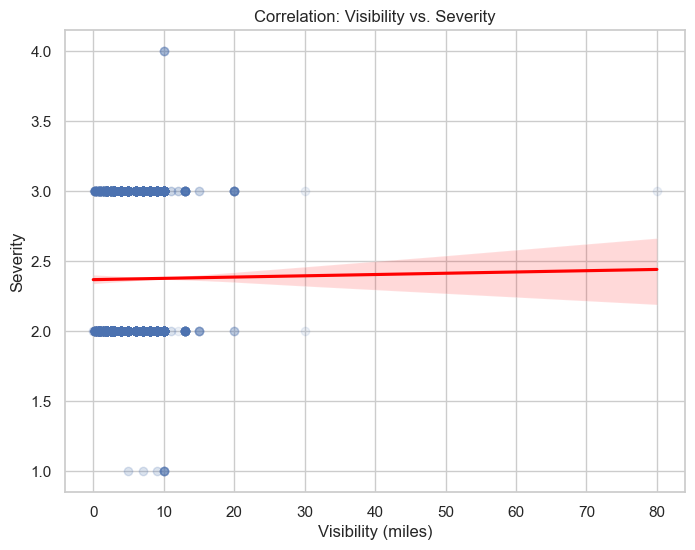

Correlation Coefficient: -0.0044


In [6]:
plt.figure(figsize=(8, 6))
# Using a sample of 20k records for faster plotting
sns.regplot(x='Visibility(mi)', y='Severity', data=df.sample(20000, random_state=42), 
            scatter_kws={'alpha':0.1}, line_kws={'color':'red'})

plt.title('Correlation: Visibility vs. Severity')
plt.xlabel('Visibility (miles)')
plt.ylabel('Severity')
plt.show()

corr_val = df['Visibility(mi)'].corr(df['Severity'])
print(f"Correlation Coefficient: {corr_val:.4f}")